In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [9]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
class_names[y_train[1]]

'T-shirt/top'

In [13]:
class_names[y_train[5]]

'Ankle boot'

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


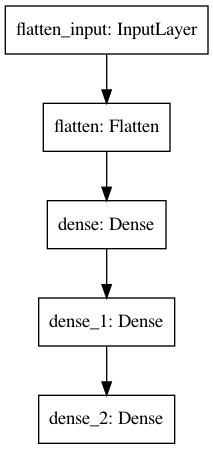

In [16]:
keras.utils.plot_model(model)

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer('dense') is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.00448718, -0.04970544,  0.0626027 , ..., -0.04903951,
         0.00633931,  0.01385477],
       [-0.0663309 ,  0.01500207,  0.0434427 , ..., -0.01628872,
        -0.04152116,  0.0338551 ],
       [ 0.05743487,  0.04728935,  0.00685483, ...,  0.04345017,
         0.01258563, -0.0050042 ],
       ...,
       [ 0.02005092,  0.05216672,  0.03850234, ...,  0.04585513,
         0.06079198,  0.0115339 ],
       [-0.0165615 ,  0.05688162,  0.07420473, ..., -0.03482372,
         0.01417764,  0.02107376],
       [ 0.03960398, -0.03010345, -0.0726369 , ..., -0.00026809,
         0.03612633,  0.04602155]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7164 - accuracy: 0.7629 - val_loss: 0.5154 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.8302 - val_loss: 0.4529 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4455 - accuracy: 0.8440 - val_loss: 0.4101 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4185 - accuracy: 0.8529 - val_loss: 0.3942 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3981 - accuracy: 0.8591 - val_loss: 0.3826 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3811 - accuracy: 0.8661 - val_loss: 0.3692 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3667 - accuracy: 0.8694 - val_loss: 0.3663 - val_accuracy:

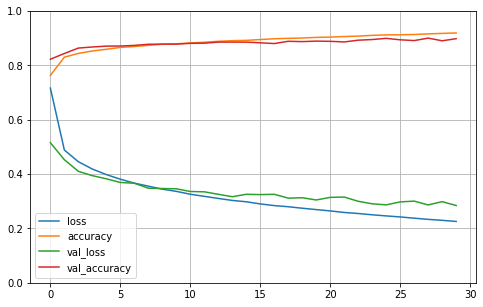

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.fit(X_train, y_train,
    validation_data=(X_valid, y_valid))

1719/1719 [==============================] - 2s 1ms/step - loss: 0.2229 - accuracy: 0.9193 - val_loss: 0.2850 - val_accuracy: 0.8968


In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 55.1267 - accuracy: 0.8635


[55.126731872558594, 0.8634999990463257]

In [30]:
X_new = X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = model.predict_classes(X_new)

/Users/bedwards/.pyenv/versions/3.8.5/envs/data-science/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
y_pred

array([9, 2, 1])

In [33]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 857us/step - loss: 0.8538 - val_loss: 1.1024
Epoch 2/20
363/363 [==============================] - 0s 695us/step - loss: 0.8584 - val_loss: 0.5213
Epoch 3/20
363/363 [==============================] - 0s 662us/step - loss: 0.4877 - val_loss: 0.4718
Epoch 4/20
363/363 [==============================] - 0s 846us/step - loss: 0.4545 - val_loss: 0.4584
Epoch 5/20
363/363 [==============================] - 0s 642us/step - loss: 0.4383 - val_loss: 0.4452
Epoch 6/20
363/363 [==============================] - 0s 660us/step - loss: 0.4301 - val_loss: 0.4409
Epoch 7/20
363/363 [==============================] - 0s 714us/step - loss: 0.4242 - val_loss: 0.4282
Epoch 8/20
363/363 [==============================] - 0s 617us/step - loss: 0.4169 - val_loss: 0.4232
Epoch 9/20
363/363 [==============================] - 0s 752us/step - loss: 0.4119 - val_loss: 0.4201
Epoch 10/20
363/363 [==============================] - 0s 638us/step - loss: 0.407

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [38]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8026 - val_loss: 0.7849
Epoch 2/20
363/363 [==============================] - 0s 762us/step - loss: 0.6286 - val_loss: 0.4721
Epoch 3/20
363/363 [==============================] - 0s 752us/step - loss: 0.4568 - val_loss: 0.4575
Epoch 4/20
363/363 [==============================] - 0s 706us/step - loss: 0.4441 - val_loss: 0.4489
Epoch 5/20
363/363 [==============================] - 0s 718us/step - loss: 0.4352 - val_loss: 0.4499
Epoch 6/20
363/363 [==============================] - 0s 736us/step - loss: 0.4266 - val_loss: 0.4322
Epoch 7/20
363/363 [==============================] - 0s 763us/step - loss: 0.4197 - val_loss: 0.4289
Epoch 8/20
363/363 [==============================] - 0s 668us/step - loss: 0.4162 - val_loss: 0.4204
Epoch 9/20
363/363 [==============================] - 0s 639us/step - loss: 0.4074 - val_loss: 0.4198
Epoch 10/20
363/363 [==============================] - 0s 664us/step - loss: 0.4029 

In [40]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 5511), started 3 days, 22:46:41 ago. (Use '!kill 5511' to kill it.)

In [41]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " +str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)